### About the Dataset
Private companies with a valuation over $1 billion as of March 2022, including each company's
current valuation, funding, country of origin, industry, select investors, and the years they were
founded and became unicorns.

Loading the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
sns.set_style("darkgrid")

Loading the Dataset

In [2]:
unicorn =pd.read_csv("Unicorn_Companies.csv")
unicorn.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Data Preparation and Cleaning

In [3]:
unicorn.shape #the dataset contains 1074 rows and 10 columns

(1074, 10)

In [4]:
unicorn.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

In [5]:
#To get the statistical range of values contained in the Dataset
unicorn.describe()

,Year Founded
count,1074.000000
mean,2012.895717
std,5.698573
min,1919.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2021.000000


In [6]:
unicorn.isna().sum()

Company              0
Valuation            0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding              0
Select Investors     1
dtype: int64

In [7]:
unicorn["City"].value_counts().head() #to extract the city with the highest data

San Francisco    152
New York         103
Beijing           63
Shanghai          44
London            34
Name: City, dtype: int64

In [8]:
#we can replace the null values in the  column with the city that has the highest data which is San Francisco
unicorn["City"]= unicorn["City"].fillna("San Francisco")

In [9]:
#we can replace the null value in "Select Investors" column with None
unicorn["Select Investors"]= unicorn["Select Investors"].fillna("None")

In [10]:
unicorn.isna().sum()

Company             0
Valuation           0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding             0
Select Investors    0
dtype: int64

In [11]:
unicorn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1074 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1074 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [12]:
unicorn["Date Joined"]= pd.to_datetime(unicorn["Date Joined"])

In [13]:
unicorn.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


How long does it usually take for a company to become a unicorn? Has it always been
this way?

In [14]:
unicorn['year_joined']= unicorn["Date Joined"].dt.year #to extract the year each company joined unicorn

In [15]:
unicorn

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors,year_joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011
...,...,...,...,...,...,...,...,...,...,...,...
1069,Zhaogang,$1B,2017-06-29,E-commerce & direct-to-consumer,Shanghai,China,Asia,2012,$379M,"K2 Ventures, Matrix Partners China, IDG Capital",2017
1070,Zhuan Zhuan,$1B,2017-04-18,E-commerce & direct-to-consumer,Beijing,China,Asia,2015,$990M,"58.com, Tencent Holdings",2017
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ...",2021
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North...",2021


In [16]:
#subtracting the year founded from the year joined to give the number of years it took each company to reach unicorn
unicorn["unicorn_year"]= unicorn["year_joined"] - unicorn["Year Founded"]
unicorn["unicorn_year"]

0        5
1       10
2       10
3        4
4        6
        ..
1069     5
1070     2
1071     3
1072    16
1073     6
Name: unicorn_year, Length: 1074, dtype: int64

In [17]:
unicorn["unicorn_year"].value_counts().head(10)

6     138
5     129
4     125
7     107
3      98
8      88
2      68
10     62
9      52
11     36
Name: unicorn_year, dtype: int64

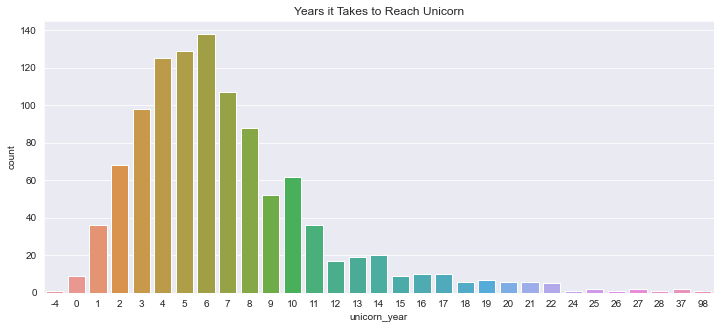

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x=unicorn["unicorn_year"])
plt.title("Years it Takes to Reach Unicorn");

We can see that the more stable and common year for a company to reach unicorn is about 4-7 years, it might take a lesser time or even a longer period depending on 
Also,There are very few companies which takes more than 22-23 years to become unicorns

In [19]:
unicorn["Valuation"]

0       $180B
1       $100B
2       $100B
3        $95B
4        $46B
        ...  
1069      $1B
1070      $1B
1071      $1B
1072      $1B
1073      $1B
Name: Valuation, Length: 1074, dtype: object

In [20]:
unicorn['Valuation'] = unicorn['Valuation'].str.replace(r"$",'',regex=True)

In [21]:
unicorn['Valuation'] = unicorn['Valuation'].str.replace(r"B",'',regex=True)

In [22]:
unicorn["Valuation"]= unicorn["Valuation"].astype("int")

In [23]:
unicorn.rename(columns={"Valuation": "Valuation(B$)"}, inplace = True)

In [24]:
Investors =unicorn["Select Investors"].str.split(",", expand = True)
Investors

,0,1,2,3
0,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Khosla Ventures,LowercaseCapital,capitalG,None
4,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
...,...,...,...,...
1069,K2 Ventures,Matrix Partners China,IDG Capital,None
1070,58.com,Tencent Holdings,None,None
1071,Xingwang Investment Management,China Capital Investment Group,Matrix Partners China,None
1072,IAG Capital Partners,Augmentum Fintech,Northzone Ventures,None


In [25]:
Investors= Investors.rename(columns={0:"Investor A", 1:"Investor B", 2:"Investor C", 3:"Investor D"})

In [26]:
Investors

,Investor A,Investor B,Investor C,Investor D
0,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Khosla Ventures,LowercaseCapital,capitalG,None
4,Institutional Venture Partners,Sequoia Capital,General Atlantic,None
...,...,...,...,...
1069,K2 Ventures,Matrix Partners China,IDG Capital,None
1070,58.com,Tencent Holdings,None,None
1071,Xingwang Investment Management,China Capital Investment Group,Matrix Partners China,None
1072,IAG Capital Partners,Augmentum Fintech,Northzone Ventures,None


In [27]:
unicorn =unicorn.drop(columns=["Select Investors"])
unicorn =pd.concat([unicorn, Investors], axis = 1)
unicorn.head()

,Company,Valuation(B$),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,year_joined,unicorn_year,Investor A,Investor B,Investor C,Investor D
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,2017,5,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,2012,10,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,2018,10,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,2014,4,Khosla Ventures,LowercaseCapital,capitalG,None
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,2011,6,Institutional Venture Partners,Sequoia Capital,General Atlantic,None


Which countries have the most unicorns? Are there any cities that appear to be industry
hubs?

In [28]:
highest_unicorn = unicorn.sort_values("Valuation(B$)", ascending = False)
highest_unicorn.head()

,Company,Valuation(B$),Date Joined,Industry,City,Country,Continent,Year Founded,Funding,year_joined,unicorn_year,Investor A,Investor B,Investor C,Investor D
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,2017,5,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,2012,10,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,2018,10,Tiger Global Management,Sequoia Capital China,Shunwei Capital Partners,None
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,2014,4,Khosla Ventures,LowercaseCapital,capitalG,None
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,2011,6,Institutional Venture Partners,Sequoia Capital,General Atlantic,None


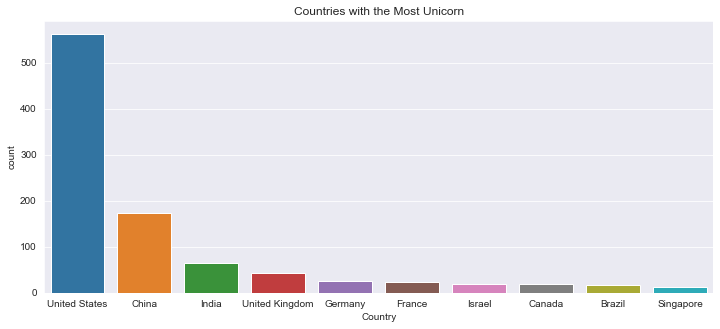

In [29]:
plt.figure(figsize=(12,5))
sns.countplot(x=unicorn["Country"], order = highest_unicorn['Country'].value_counts().nlargest(10).index)
plt.title("Countries with the Most Unicorn");

United States has the most unicorn

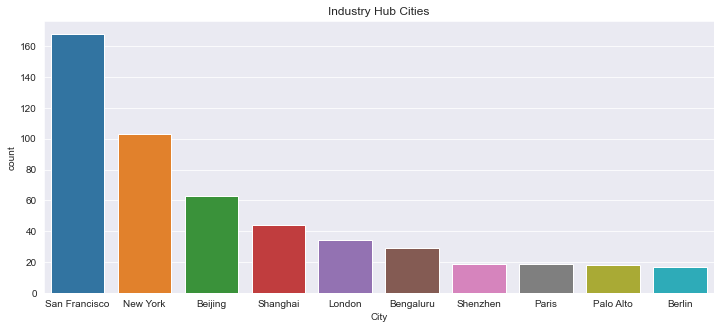

In [30]:
plt.figure(figsize=(12,5))
sns.countplot(x= unicorn["City"], order = unicorn["City"].value_counts().nlargest(10).index)
plt.title("Industry Hub Cities");

San Francisco and New York is shown to be the Industry Hub City in USA
Beijing and Shanghai are the industry hub in China

Which investors have funded the most unicorns?

In [31]:
total_investors=pd.concat([unicorn["Investor A"], unicorn["Investor B"], unicorn["Investor C"], unicorn["Investor D"]], axis =0)

In [32]:
total_investors

0                Sequoia Capital China
1                        Founders Fund
2              Tiger Global Management
3                      Khosla Ventures
4       Institutional Venture Partners
                     ...              
1069                              None
1070                              None
1071                              None
1072                              None
1073                              None
Length: 4296, dtype: object

<AxesSubplot:ylabel='None'>

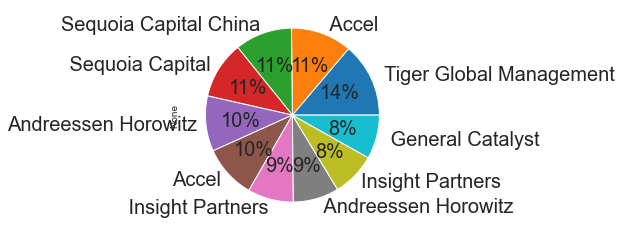

In [33]:
total_investors.value_counts().nlargest(10).plot(kind='pie',  textprops={'fontsize': 20}, autopct='%1.0f%%')

Tiger Global Management has funded the most unicorn by 14%, Accel and Sequoia funded by 11%    

### CONCLUSION
Large percentage of the unicorn companies belong to top 3 countries which are USA, China and India. Canada, Brazil and Singapore are right behind.

San Francisco and New York in USA, Beijing and Shanghai in China are the base cities for these successful startups

Tiger G lobal Management, Accel, Sequoia Capital China are the top investors to fund unicorns